# 데이터셋 로드 
pima-classification-baseline-02
https://colab.research.google.com/github/corazzon/boostcourse-ds-511/blob/master/pima-classification-baseline-02.ipynb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [84]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

# Feature Engineering
수치의 범위가 넓으면 수치형 변수의 조건이 너무 세분화되어 tree가 깊어집니다.  
샘플의 수가 적으면 오퍼피팅(과적합)이 발생할 가능성이 높습니다.

오버피팅이란 모의고사에 너무 익숙해져서 실전시험에서 좋은 결과를 얻지 못하는 현상입니다.

 

그러므로 수치형 데이터를 범주화하여 성능을 높여보겠습니다.



## 연속 수치 -> 범주형 변수로 변경하기

In [85]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


In [86]:
# df['Age_low'] = df['Age'] <25
# df['Age_middle'] = (df['Age']>=25) & (df['Age'] <= 60) #알파벳 'and'를 쓰면 안됨
# df['Age_high'] = df['Age'] > 60

# df[['Age', 'Age_low', 'Age_middle', 'Age_high']].head()

In [87]:
# One-Hot-Encoding
# 수치 => 범주 => 수치
df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<Axes: xlabel='Age_high', ylabel='count'>

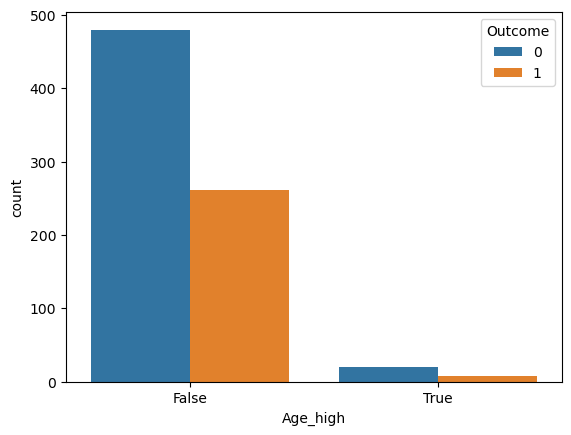

In [88]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

## 결측치 다루기

In [89]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [90]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
df['Insulin_nan'] = df['Insulin'].replace(0, np.nan)
df[['Insulin', 'Insulin_nan']].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [92]:
df['Insulin_nan'].isnull().sum()

374

In [93]:
#결측치 비율
df['Insulin_nan'].isnull().mean()

0.4869791666666667

In [94]:
df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].agg(['mean', 'median'])

C:\Users\semin\AppData\Local\Temp\ipykernel_8940\2813521386.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Outcome'])['Insulin', 'Insulin_nan'].agg(['mean', 'median'])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

In [95]:
#결측치 채우기 (평규값으로)
# df.loc[(df['Outcome']== 1) & (df['Insulin_nan'].isnull()), "Insulin_nan" ] = 206
# df.loc[(df['Outcome']== 0) & (df['Insulin_nan'].isnull()), "Insulin_nan" ] = 130

#결측치 채우기 (중앙값으로)
df.loc[(df['Outcome']== 1) & (df['Insulin_nan'].isnull()), "Insulin_nan" ] = 169.5
df.loc[(df['Outcome']== 0) & (df['Insulin_nan'].isnull()), "Insulin_nan" ] = 102.5

## 정규분포 만들기
- 왜도: 한쪽으로 치우친 정도
- 첨도 : 뾰족한 정도

In [96]:
# sns.distplot(df['Insulin'])

In [97]:
# sns.distplot(df.loc[df['Insulin'] > 0, 'Insulin'])

In [98]:
#sns.distplot(np.log(df.loc[df['Insulin'] > 0, 'Insulin'] + 1)) 
#값이 정규분포 형태로 만들어지게 됨 -> ml/dl 알고리즘이 좀 더 좋은 성능을 낸다

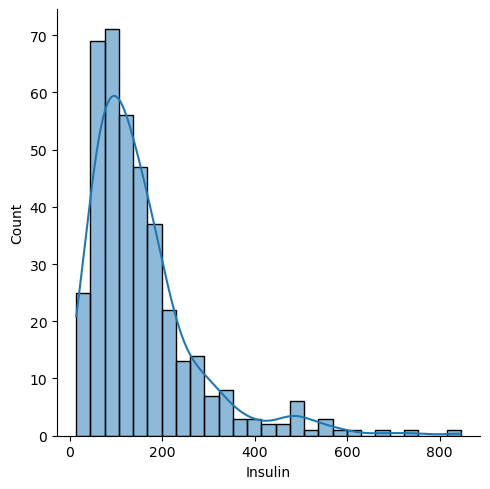

In [99]:
# sns.distplot(df['Insulin_nan']) #왼쪽에 치우친 값이라는 것을 확인
sns.displot(df.loc[df["Insulin"] > 0, "Insulin"], kde=True)

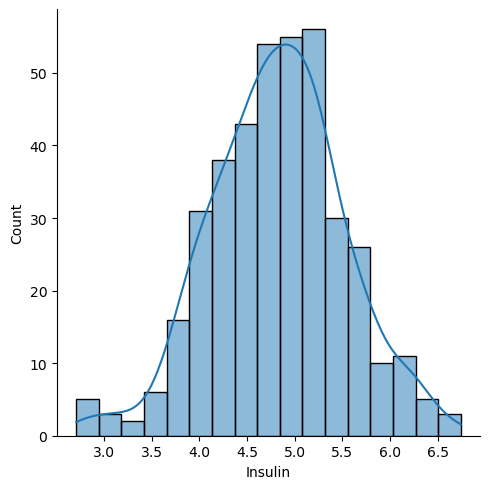

In [100]:
df['Insulin_log'] = np.log(df['Insulin_nan'] + 1) #1이하의 값은 마이너스 무한으로 수렴
# sns.distplot(df['Insulin_log'])

Insulin_log = np.log(df.loc[df["Insulin"] > 0, "Insulin"] + 1)
sns.displot(Insulin_log, kde=True)

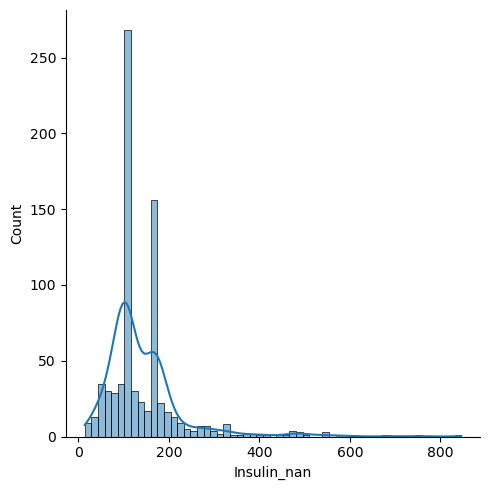

In [101]:
sns.displot(df, x="Insulin_nan", kde=True)

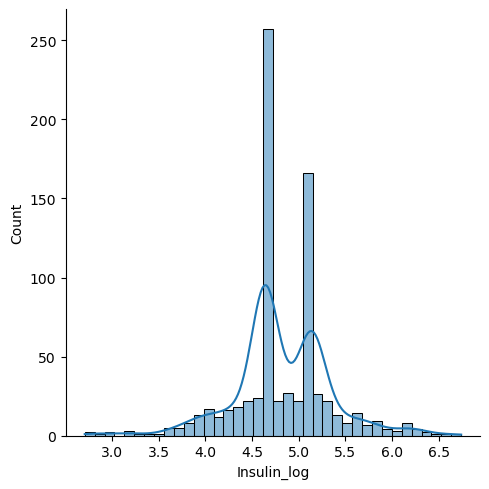

In [102]:
df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.displot(df, x="Insulin_log", kde=True)

#중앙값으로 결측치를 대체해줘서 두개의 봉이 나타남

## 파생변수 만들기
- 상관변수를 통해!

In [103]:
# sns.lmplot(data=df,
#               x= 'Insulin_nan',
#               y='Glucose', hue='Outcome')

In [106]:
df['low_glu_insulin'] = (df['Glucose'] < 100) & (df['Insulin_nan'] <= 102.5)
df['low_glu_insulin'].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [107]:
pd.crosstab(df['Outcome'], df['low_glu_insulin'])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


## 이상치 다루기
-https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

<Axes: xlabel='Insulin_nan'>

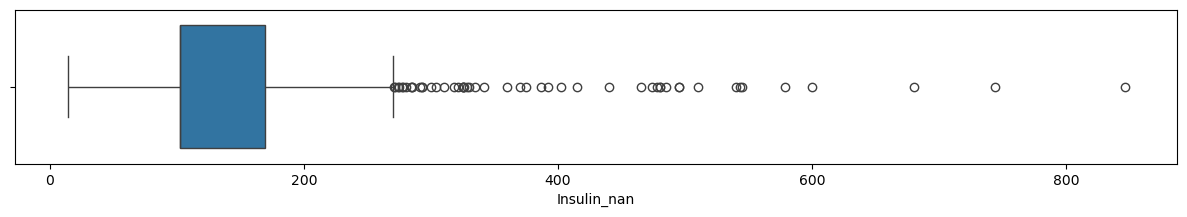

In [108]:
plt.figure(figsize=(15,2))
sns.boxplot(df['Insulin_nan'], orient='h')

In [109]:
df['Insulin_nan'].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

In [110]:
IQR3 = df['Insulin_nan'].quantile(0.75)
IQR1 = df['Insulin_nan'].quantile(0.25)
IQR = IQR3 - IQR1
IQR

67.0

In [111]:
OUT = IQR3 + (IQR * 1.5) #outlier
OUT

270.0

In [112]:
df[df['Insulin_nan'] > OUT].shape #51개를 제거하기에는 너무 많아 

(51, 16)

In [113]:
df[df['Insulin_nan'] > 600].shape #3개의 데이터만 제거

(3, 16)

## Scaling (피처 스케일링) 
정확도 향상에 큰 도움이 안되서 여기서는 생략

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [115]:
scaler.fit(df[['Glucose', 'DiabetesPedigreeFunction']])
scale = scaler.transform(df[['Glucose', 'DiabetesPedigreeFunction']])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [116]:
# df[['Glucose', 'DiabetesPedigreeFunction']] = scale
# df[['Glucose', 'DiabetesPedigreeFunction']].head()

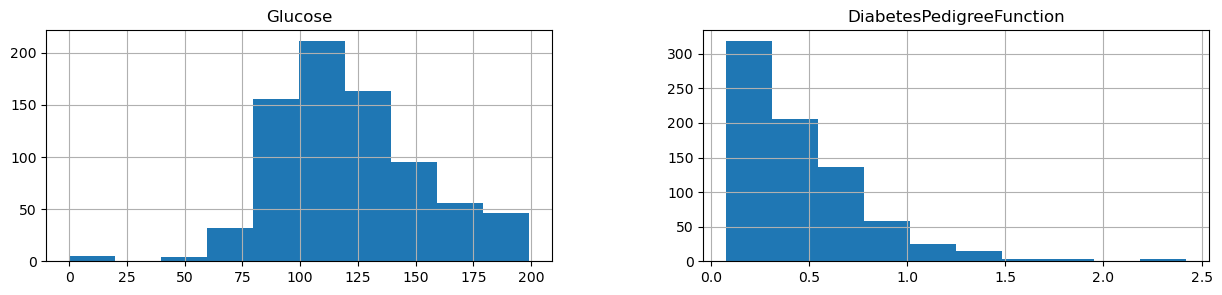

In [117]:
h = df[['Glucose', 'DiabetesPedigreeFunction']].hist(figsize=(15,3))

## csv 파일로 저장하기

In [120]:
# df.to_csv('data/diabetes_feature.csv', index=False)

In [121]:
pd.read_csv('data/diabetes_feature.csv').head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# train/test 데이터셋 나누기

In [63]:
split_count = int(df.shape[0]*0.8)
train = df[:split_count].copy()
train.shape

(614, 16)

In [64]:
train[train['Insulin_nan']<600].shape #4개가 빠짐

(610, 16)

In [65]:
train = train[train['Insulin_nan'] < 600] #이상치 제외한 값들
train.shape

(610, 16)

In [66]:
test = df[split_count:].copy()
test.shape

(154, 16)

# 학습/예측에 사용할 칼럼

In [67]:
#pregnancies, outcome 제외한 칼럼들
#pregnancies 대신 pregnancies_high 이용할 것

feature_names = train.columns.tolist()
feature_names.remove('Pregnancies')
feature_names.remove('Outcome')
feature_names.remove('Age_low')
feature_names.remove('Age_middle')
feature_names.remove('Age_high')
feature_names.remove('Insulin')
feature_names.remove('Insulin_log')
print(feature_names)

['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high', 'Insulin_nan', 'low_glu_insulin']


# 정답값/예측해야 할 값

In [68]:
#label_name이라는 변수에 예측할 컬럼의 이름을 담기
label_name = "Outcome"
label_name

'Outcome'

# 학습/예측 데이터셋 만들기

In [69]:
X_train = train[feature_names]
print(X_train.shape)
# X_train.head()

(610, 9)


In [70]:
y_train = train[label_name]
print(y_train.shape)
# y_train.head()

(610,)


In [71]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,0.535352,74,26,36.1,0.257084,50,True,144.0,False
615,-0.466156,72,0,25.8,-0.799958,27,False,102.5,False
616,-0.121888,96,0,28.7,-0.950964,30,False,102.5,False
617,-1.655448,62,13,20.1,-0.648952,23,False,15.0,True
618,-0.278373,82,24,28.2,2.446670,50,True,169.5,False


In [72]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [73]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

## 학습(훈련)

In [74]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## 예측

In [75]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1], dtype=int64)

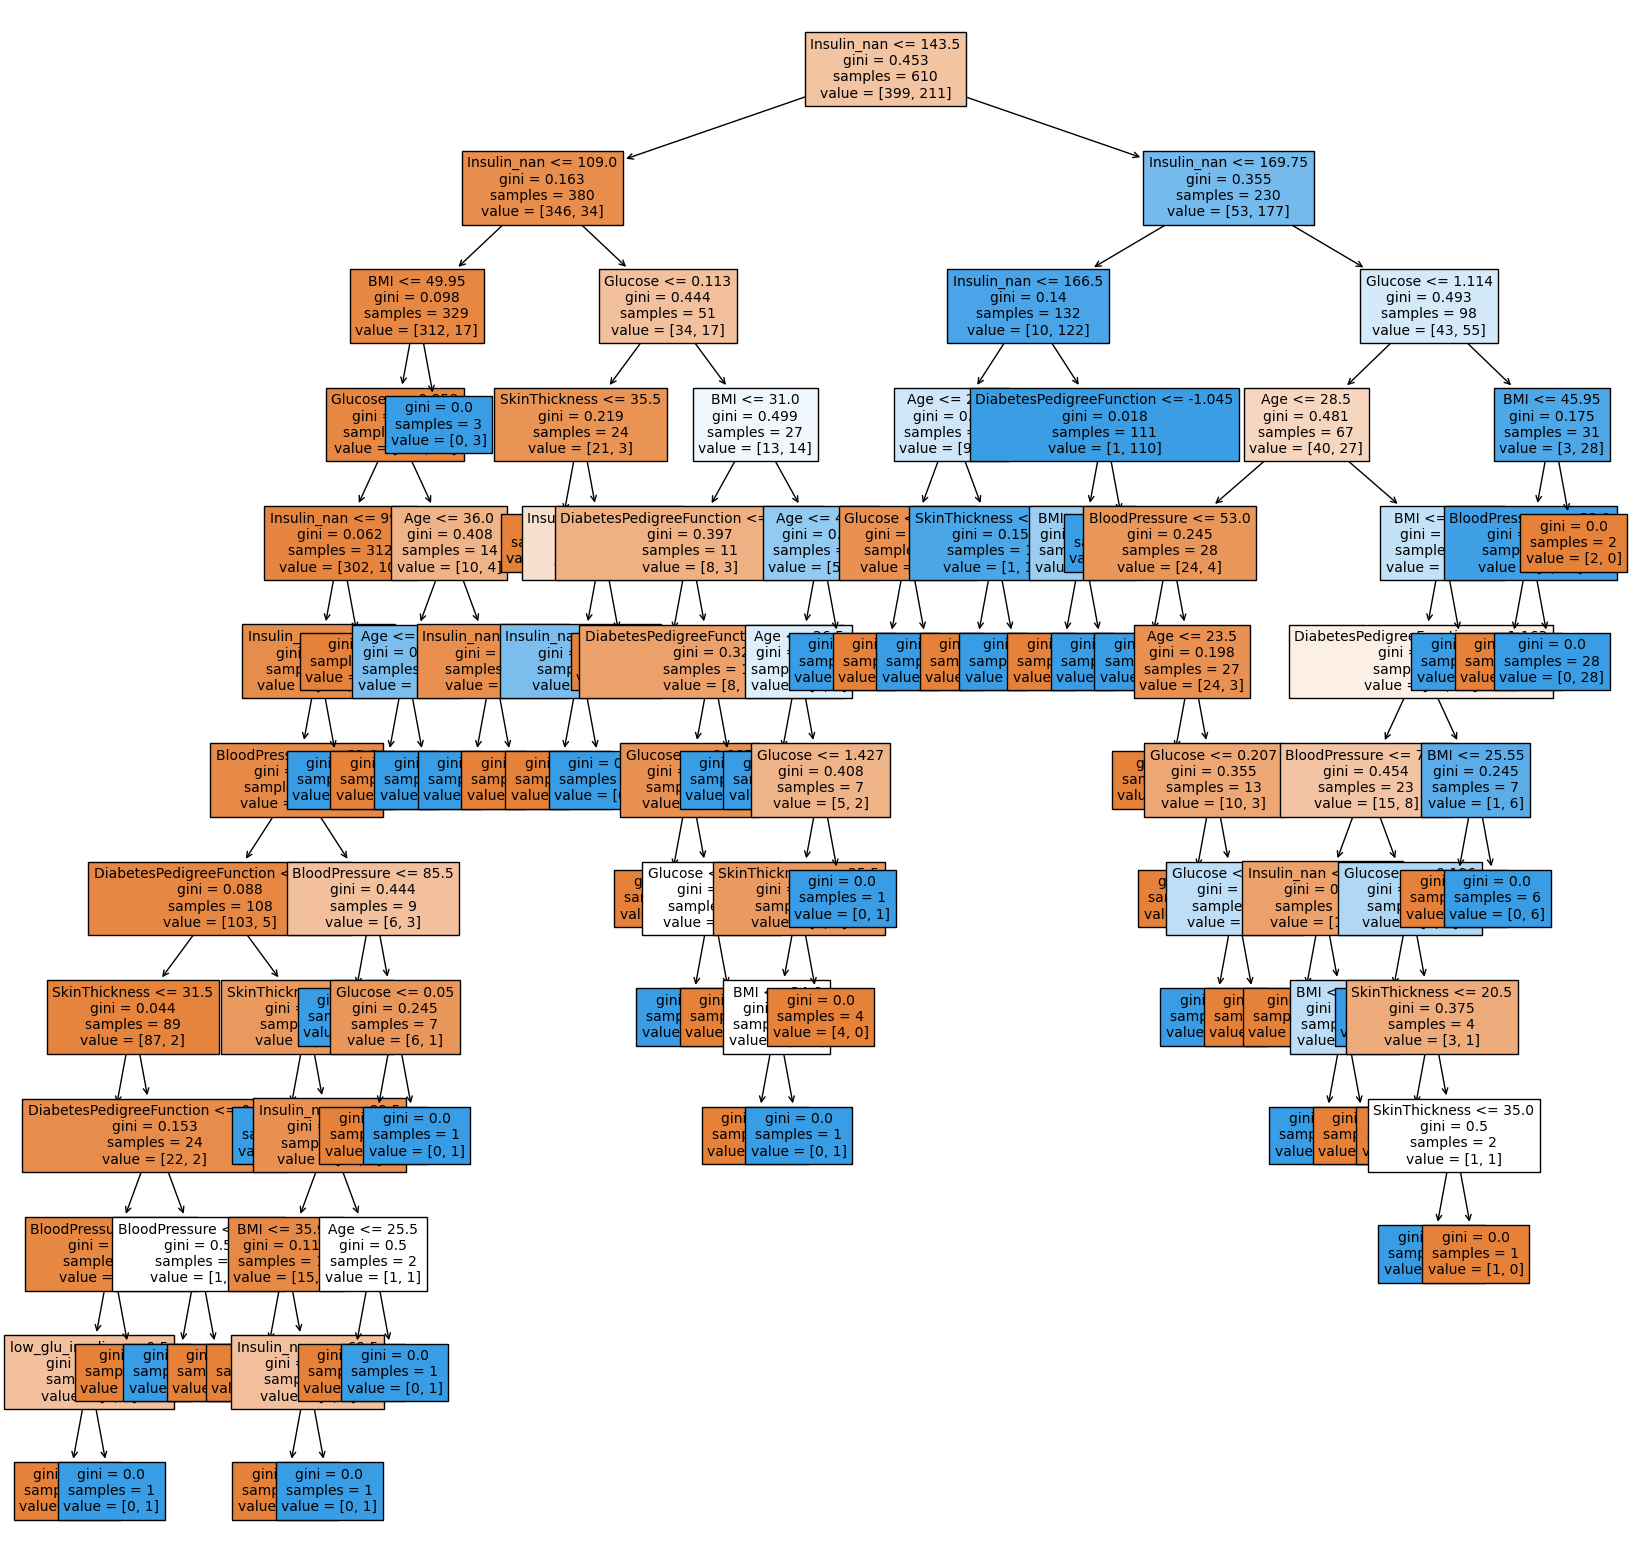

In [76]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree= plot_tree(model,
                   feature_names=feature_names,
                   filled=True,
                   fontsize=10)

In [77]:
# import graphviz
# from sklearn.tree import export_graphviz

# dot_tree = export_graphviz(model,
#                               feature_names=feature_names,
#                               filled=True)
# graphviz.Source(dot_tree)

In [78]:
model.feature_importances_

array([0.10720708, 0.03829317, 0.02739544, 0.08008031, 0.02662991,
       0.08272508, 0.        , 0.63283861, 0.0048304 ])

<Axes: >

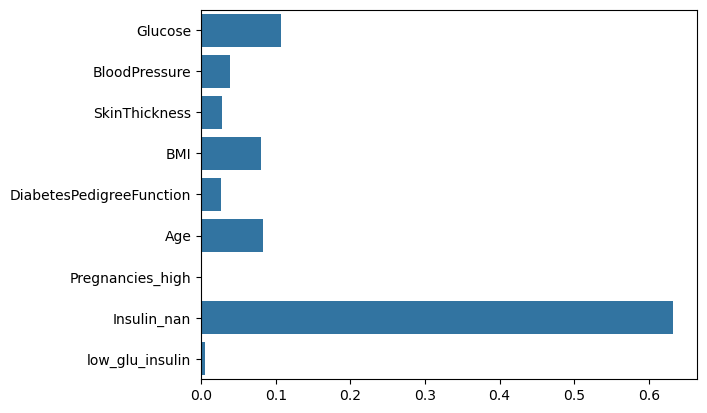

In [83]:
sns.barplot(x=model.feature_importances_,
               y=feature_names)
#이전과는 다르게 Pregnancies가 중요한 역할을 하지 않습니다.

## 정확도 Accuracy 측정

전체적으로 틀린 개수가 39개로 줄어들어서 점수가 74점으로 좋아졌습니다.

 

In [80]:
diff_count = abs(y_test - y_predict).sum()
diff_count

15

In [81]:
(len(y_test) - diff_count ) / len(y_test) * 100

90.25974025974025

In [82]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

90.25974025974025

In [ ]:
# sns.countplot(data=df,
#                  x= 'Age_low',
#                  hue= 'Outcome') #발병률이 낮다는 걸 확인

In [ ]:
#다시 학습/예측 데이터셋 나누기
# split_count = int(df.shape[0]*0.8)
# train = df[:split_count].copy()
# test = df[split_count:].copy()

In [ ]:
#학습/예측에 사용할 컬럼
# feature_names = train.columns.tolist()
# feature_names.remove('Pregnancies')
# feature_names.remove('Outcome')
# feature_names.remove('Age')
# feature_names

In [ ]:
# label_name= 'Outcome'
# label_name

In [ ]:
# X_train = train[feature_names]
# y_train = train[label_name]

# X_test = test[feature_names]
# y_test = test[label_name]

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train) #학습

In [ ]:
# y_predict = model.predict(X_test) #예측

In [ ]:
# from sklearn.tree import plot_tree
# tree = plot_tree(model, 
#                     feature_names=feature_names,
#                     filled=True,
#                     fontsize =10)

In [ ]:
# model.feature_importances_

In [ ]:
# sns.barplot(x=model.feature_importances_,
#                y= feature_names)

In [ ]:
# 44 -> 39 -> 49 (25세 기준) -> 55
# diff_count = abs(y_predict - y_test).sum()
# diff_count

In [ ]:
# split_count = int(df.shape[0]*0.8)
# train = df[:split_count].copy()
# test = df[split_count:].copy()

# feature_names = train.columns.tolist()
# feature_names.remove('Pregnancies')
# feature_names.remove('Outcome')
# feature_names.remove('Age_low')
# feature_names.remove('Age_middle')
# feature_names.remove('Age_high')
# feature_names.remove('Insulin')
# feature_names.remove('Insulin_nan')
# print(feature_names)


# label_name= 'Outcome'

# X_train = train[feature_names]
# y_train = train[label_name]

# X_test = test[feature_names]
# y_test = test[label_name]

# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train) #학습
# y_predict = model.predict(X_test)

# from sklearn.tree import plot_tree
# plt.figure(figsize=(20,20))
# tree = plot_tree(model, 
#                     feature_names=feature_names,
#                     filled=True,
#                     fontsize =10)

In [ ]:
# #피처 중요도 시각화 하기
# sns.barplot(x=model.feature_importances_,
#                y= feature_names)
# #정확도 측정
# diff_count = abs(y_test- y_predict).sum()
# print(diff_count)

# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_predict) * 100